In [1]:
# Load Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [2]:
# file_path = "tenpercent_bert.csv"
file_path = "cleaned_dataset_10percent.csv"
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
dataset

,ID,interview_date,country,NPS,translated_comment,customer_type,comment_length,translated_comment_preprocessed
0,194022,2021-11-02,Netherlands,2.0,It took days for me to get a response and the ...,detractors,67,took day get response answer make no sense
1,44408,2021-11-02,Czech,10.0,I was looking at the technician's hands the wh...,promoters,271,looking technician hand whole time convinced p...
2,27670,2022-12-06,Netherlands,10.0,"You will be greeted in a friendly manner, and ...",promoters,107,greeted friendly manner question resolved imme...
3,444668,2022-04-19,Poland,9.0,Very nice stationary service at the point in G...,promoters,222,nice stationary service point galeria mokotów ...
4,285902,2021-12-12,Netherlands,10.0,I have been a satisfied customer at Eon all my...,promoters,54,satisfied customer eon life
...,...,...,...,...,...,...,...,...
49136,75637,2020-06-20,Czech,6.0,&;Pricing policy.&;,detractors,27,pricing policy
49137,229958,2019-12-17,Czech,1.0,Power electricity price,detractors,23,power electricity price
49138,361699,2021-11-01,Netherlands,9.0,Nice App....and no problems with delivery...,promoters,44,nice appand no problem delivery
49139,336187,2021-07-01,Czech,7.0,&;willingness and helpfulness&;,passives,39,willingness helpfulness


In [3]:
file_path = "tenpercent_bert.csv"
# file_path = "cleaned_dataset.csv"
dataset2 = pd.read_csv(file_path)

In [4]:
dataset2['bert_sentiment'] = dataset2['bert_sentiment'] * 2

In [5]:
dataset3 = pd.merge(dataset, dataset2)
dataset3

,ID,interview_date,country,NPS,translated_comment,customer_type,comment_length,translated_comment_preprocessed,bert_sentiment
0,372767,2021-08-17,Hungary,8.0,Because they kept the time.,passives,27,kept time,8
1,385480,2021-12-23,Netherlands,9.0,Helped clearly and quickly,promoters,26,helped clearly quickly,10
2,310339,2021-07-08,Romania,10.0,the invoices arrive on time,promoters,27,invoice arrive time,6
3,55812,2022-09-20,Netherlands,9.0,"Friendly, competent and helpful",promoters,31,friendly competent helpful,10
4,319241,2019-12-06,Italy,9.0,I HAVE ALWAYS CHOSEN YOU WHY? DO THINGS VERY W...,promoters,106,always chosen thing well reading always coinci...,10
...,...,...,...,...,...,...,...,...,...
4723,56345,2021-10-15,Netherlands,9.0,Good service and good prices and good contracts.,promoters,48,good service good price good contract,10
4724,18486,2022-03-10,Czech,0.0,&;Unacceptable behavior towards your long-term...,detractors,78,unacceptable behavior towards longterm regular...,2
4725,409293,2022-06-15,Poland,7.0,satisfied for now,passives,17,satisfied,8
4726,231022,2021-09-24,Czech,9.0,It was handled quickly and everything was fine,promoters,46,handled quickly everything fine,8


In [6]:

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
def get_vader_sentiment(text):
    # Obtain the compound score
    score = sid.polarity_scores(text)['compound']
    
    return score

# Apply the sentiment analysis to the dataset
dataset3['vader_sentiment'] = dataset3['translated_comment_preprocessed'].apply(get_vader_sentiment)
dataset3["sentiment"] = np.select([dataset3["vader_sentiment"] < 0, dataset3["vader_sentiment"] == 0, dataset3["vader_sentiment"] > 0],
                           ['neg', 'neu', 'pos'])
dataset3['vader_sentiment'] = ((dataset3['vader_sentiment'] + 1) * 5).round(2)
dataset3[['NPS', 'translated_comment', 'translated_comment_preprocessed', 'bert_sentiment', 'vader_sentiment', 'sentiment']].head(20)

,NPS,translated_comment,translated_comment_preprocessed,bert_sentiment,vader_sentiment,sentiment
0,8.0,Because they kept the time.,kept time,8,5.00,neu
1,9.0,Helped clearly and quickly,helped clearly quickly,10,7.01,pos
2,10.0,the invoices arrive on time,invoice arrive time,6,5.00,neu
3,9.0,"Friendly, competent and helpful",friendly competent helpful,10,9.04,pos
4,9.0,I HAVE ALWAYS CHOSEN YOU WHY? DO THINGS VERY W...,always chosen thing well reading always coinci...,10,7.20,pos
5,10.0,&;satisfaction&;,satisfaction,10,7.20,pos
6,10.0,WELL THE POSITIVE NOTE IS ABOVE ALL DUE TO THE...,well positive note due short time necessary bo...,8,9.60,pos
7,5.0,I have no basis for comparison.,no basis comparison,4,3.52,neg
8,10.0,Very nice and professional service,nice professional service,10,7.11,pos
9,4.0,See above,see,6,5.00,neu


In [14]:
from textblob import TextBlob

In [15]:
def calculate_sentiment(text):
    # TextBlob returns a namedtuple of the form Sentiment(polarity, subjectivity)
    # Polarity is a float within the range [-1.0, 1.0]
    return TextBlob(text).sentiment.polarity

# Applying the sentiment analysis function to the 'translated_comment_preprocessed' column
dataset3['textblob_sentiment'] = dataset3['translated_comment_preprocessed'].apply(calculate_sentiment)

dataset3['textblob_sentiment'] = ((dataset3['textblob_sentiment'] + 1) * 5).round(2)

dataset3['avg_sentiment'] = ((dataset3['bert_sentiment'] + dataset3['vader_sentiment'] +  (0.5)*dataset3['textblob_sentiment'])/2.5).round(2)

# Displaying the first few rows of the dataset with the sentiment scores
# dataset3[['translated_comment', 'translated_comment_preprocessed', 'customer_type', 'NPS', 'textblob_sentiment','bert_sentiment', 'vader_sentiment', 'sentiment']].head(20)
dataset3[['translated_comment','NPS', 'bert_sentiment', 'vader_sentiment', 'textblob_sentiment', 'avg_sentiment']].tail(20)



,translated_comment,NPS,bert_sentiment,vader_sentiment,textblob_sentiment,avg_sentiment
4708,You are priced fairly and above all the great ...,10.0,10,9.58,7.59,9.35
4709,&;Everything was always ok.&;,9.0,8,6.48,7.50,7.29
4710,Well done,8.0,10,6.37,5.00,7.55
4711,"Delighted customer, great service, excellent a...",10.0,10,9.71,9.38,9.76
4712,I LIKE. ? ORGANIZED. I LIKE THE APP VERY MUCH....,10.0,8,7.79,6.00,7.52
4713,"Professionalism, knowledge of consultancy",10.0,10,5.00,5.00,7.00
4714,Pleased that it could be done online.,10.0,8,7.20,7.50,7.58
4715,SATISFACTION,10.0,10,7.20,5.00,7.88
4716,It works stably. No fuss.,10.0,8,3.52,5.00,5.61
4717,"since I'm down to earth, I've been with you fo...",8.0,10,5.00,5.00,7.00


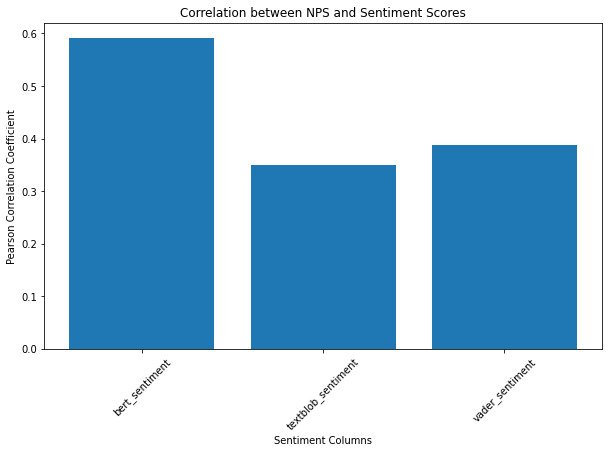

In [12]:
from scipy.stats import pearsonr

sentiment_columns = ['bert_sentiment', 'textblob_sentiment', 'vader_sentiment']

# Initialize a dictionary to store correlation results
correlations = {}

# Calculate correlations
for col in sentiment_columns:
    corr, _ = pearsonr(dataset3['NPS'], dataset3[col])
    correlations[col] = corr

# Plotting the correlations
plt.figure(figsize=(10, 6))
plt.bar(correlations.keys(), correlations.values())
plt.xlabel('Sentiment Columns')
plt.ylabel('Pearson Correlation Coefficient')
plt.title('Correlation between NPS and Sentiment Scores')
plt.xticks(rotation=45)
plt.show()


In [13]:
correlations

{'bert_sentiment': 0.5909088510900876,
 'textblob_sentiment': 0.3501369745505145,
 'vader_sentiment': 0.3876288109394459}

In [14]:
dataset3.to_csv("three_sentiments.csv", index=False)